Question 1: Analysis

In [63]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("Shopify.csv")
df.order_amount.describe()



count      5000.000000
mean       3145.128000
std       41282.539349
min          90.000000
25%         163.000000
50%         284.000000
75%         390.000000
max      704000.000000
Name: order_amount, dtype: float64

In [64]:
df.total_items.describe()

count    5000.00000
mean        8.78720
std       116.32032
min         1.00000
25%         1.00000
50%         2.00000
75%         3.00000
max      2000.00000
Name: total_items, dtype: float64

The describe method in pandas give us the central tendancy stastistics.
The AOV of 3145.13 is quite high for sneaker business, this can be due to the high std in number of items in an order as well as the high std AOV itself. The AOV does not taken into account of total items ordered in an order. The AOV is obtained from a simple mean calculation of the order amount in the data set which can be highly affected by the tails of its distribution as hinted by its high max. The order_amount has very high std which shows that mean is suitable to describe this dataset. 
The high AOV intrigues me and I would like to look into the distribution of order amount. 


First, we shall look into the distribution of order amounts. We can see below that the extremly high order amount of $704000 ocurred 17 times which is highly unsual for the sneakers business.

In [65]:
unique_amounts = df.groupby(['order_amount']).size().reset_index(name='count').sort_values(by='order_amount', ascending=False)
unique_amounts.head(20)


,order_amount,count
257,704000,17
256,154350,1
255,102900,1
254,77175,9
253,51450,16
252,25725,19
251,1760,1
250,1408,2
249,1086,1
248,1064,1


In [66]:
unique_amounts.tail(20)

,order_amount,count
19,138,25
18,136,38
17,134,29
16,133,56
15,132,23
14,131,35
13,130,52
12,129,50
11,128,30
10,127,22


Looking further into the average cost of one pair of sneakers, we can bsee that the high occurance of a extreme data point $25725/item suggests that the dataset is highly affected by its tails in the calculation of mean.

In [67]:
df['costperitem'] = df['order_amount'].divide(df['total_items'])
unique_amt = df.groupby(['costperitem']).size().reset_index(name='count').sort_values(by='costperitem', ascending=False)
unique_amt.head(20)


,costperitem,count
57,25725.0,46
56,352.0,51
55,201.0,53
54,196.0,61
53,195.0,54
52,193.0,44
51,190.0,35
50,187.0,105
49,184.0,49
48,181.0,112


In [68]:
unique_amt.tail(20)

,costperitem,count
19,138.0,59
18,136.0,105
17,134.0,86
16,133.0,151
15,132.0,46
14,131.0,97
13,130.0,150
12,129.0,142
11,128.0,93
10,127.0,52


The above count table shows that the most orders occur in the left tail. Hence, the distribution is left tail heavy and should not use mean AOV as a reporting metric. This is confirmed with a selective visualization of the dataset using culmulative histogram.

As we can see, over 95% of entries of order amoutns are below 1200.

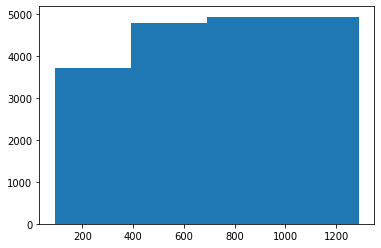

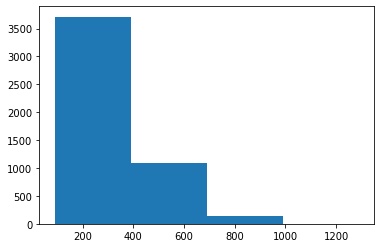

In [77]:
binslist = range(df.order_amount.min(),1500,300)

plt.hist(x,bins = binslist, cumulative='True')
plt.show()

plt.hist(x,bins = binslist)
plt.show()


We should always clean up the dataset before analyzing. I will point out a few things I would like to look into in the dataset to ensure data quality:

As I have shown, the total item has high std.   

In [78]:
unique_total_items = df.groupby(['total_items']).size().reset_index(name='count').sort_values(by='total_items', ascending=False)
unique_total_items.tail(10)

,total_items,count
7,2000,17
6,8,1
5,6,9
4,5,77
3,4,293
2,3,941
1,2,1832
0,1,1830


If some stores are wholesale sneakers store, it would make sense for customers to purchase 2000 pairs of sneakers. Let's take a look into the transactions for 2000 pairs of sneakers. In that case, I would want to calculate AOV seperately for wholesale vs. retail. 

In [79]:
df.loc[df['total_items'] == 2000]

,order_id,shop_id,user_id,order_amount,total_items,payment_method,created_at,costperitem
15,16,42,607,704000,2000,credit_card,2017-03-07 4:00:00,352.0
60,61,42,607,704000,2000,credit_card,2017-03-04 4:00:00,352.0
520,521,42,607,704000,2000,credit_card,2017-03-02 4:00:00,352.0
1104,1105,42,607,704000,2000,credit_card,2017-03-24 4:00:00,352.0
1362,1363,42,607,704000,2000,credit_card,2017-03-15 4:00:00,352.0
1436,1437,42,607,704000,2000,credit_card,2017-03-11 4:00:00,352.0
1562,1563,42,607,704000,2000,credit_card,2017-03-19 4:00:00,352.0
1602,1603,42,607,704000,2000,credit_card,2017-03-17 4:00:00,352.0
2153,2154,42,607,704000,2000,credit_card,2017-03-12 4:00:00,352.0
2297,2298,42,607,704000,2000,credit_card,2017-03-07 4:00:00,352.0


It seems like a erraneous transaction as user '607' repetitively purchased 2000*17 pairs of sneakers valued at a grand total of $12 mil at 4 am. Unless this is verfied to be true, I would remove the above data from our data set. 
Furthermore, as I have computed costperitem and tabulated its frequency. I have noticed that sneakers cost $27525/pair on average have been sold in 46 orders. I would like to exemplt those data points from the set as they may be a non-conventional type of sneakers i.e AJ Collectibles Platinum Limited Edition. In that case, the collectible sneakers should not be compared with regular for-wear sneakers. 
Lastly, we should always remove outliers from out dataset. 

count    4793.000000
mean      288.033382
std       137.024626
min        90.000000
25%       162.000000
50%       276.000000
75%       374.000000
max       676.000000
Name: order_amount, dtype: float64

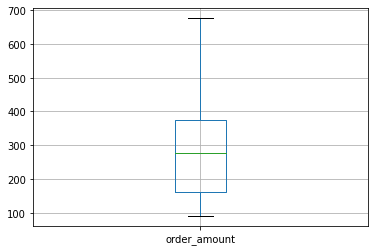

In [80]:
IQR = df['order_amount'].quantile(.75) - df['order_amount'].quantile(.25)
clean_data = df[(df['order_amount'] < df['order_amount'].quantile(.5) + IQR*1.75) & (df['order_amount'] > df['order_amount'].quantile(.5) - IQR*1.75)]
clean_data.boxplot('order_amount')
clean_data['order_amount'].describe()


Question 1 Answers:
a: 
AOV was calculated to be a simple mean of all orders which did not take into account of :
1. data quality : erraneous transactions / outliers were not removed before analysis
2. total_items of a given order: most orders have items of less than 10 but there was a hadnful of transactions where total_items = 2000. This can largely skew the AOV if not looked into account.

A better metric to use is median after I have cleaned up the dataset by removing the outliers. 

b. The metric I would report is median. 
The reason for choosing median over mode and mean is that :
1. the data was heavily left which is not suitable to be reported using mean.
2. The data is ordinal and has a skew which is not suitable to be reported using mode. 

c. The median AOV is $288.


Question 2:
a:
Answer: 54

In [ ]:
SELECT COUNT (*)
FROM Orders AS o, Shippers AS s
WHERE o.ShipperId = s.ShipperId 
AND ShipperName = "Speedy Express";


b:
Answer: Employee with last name Peacock and 40 orders

In [ ]:
SELECT e.LastName, COUNT(*) AS num_orders
FROM Employees e JOIN Orders o 
ON e.EmployeeID = o.EmployeeID
GROUP BY e.LastName
ORDER BY num_orders DESC
LIMIT 1;